# Exploratory Data Analysis - Wine Quality

---
The dataset used in this analysis can be downloaded from the UCI website ([click here to download](https://archive.ics.uci.edu/ml/datasets/wine+quality)), which is open source for end users.

The Wine Quality dataset contains information about various physicochemical properties of wines. The entire dataset is grouped into two categories: `red wine` and `white wine`. Each wine has a `quality` label associated with it. The label is in the range of 0 to 10. 

In [1]:
# importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from scipy.stats import skew
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load datasets
red_df = pd.read_csv('winequality-red.csv', delimiter=';')
white_df = pd.read_csv('winequality-white.csv', delimiter=';')
print(red_df.shape, white_df.shape)

(1599, 12) (4898, 12)


In [4]:
# view top 5 rows
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# view features
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

the dataset contains the following features,
* **Fixed acidity:** It indicates the amount of tartaric acid in wine and is measured in $g/dm^3$.
* **Volatile acidity:** It indicates the amount of acetic acid in the wine. It is measured in $g/dm^3$.
* **Citric acid:** It indicates the amount of citric acid in the wine. It is also measured in $g/dm^3$.
* **Residual sugar:** It indicates the amount of sugar left in the wine after the fermentation process is done. It is also measured in $g/dm^3$.
* **Free sulfur dioxide:** It measures the amount of sulfur dioxide (SO2) in free form. It is also measured in $g/dm^3$.
* **Total sulfur dioxide:** It measures the total amount of SO2 in the wine. This chemical works as an antioxidant and antimicrobial agent.
* **Density:** It indicates the density of the wine and is measured in $g/dm^3$.
* **pH:** It indicates the pH value of the wine. The range of value is between 0 to 14.0, which indicates very high acidity, and 14 indicates basic acidity.
* **Sulphates:** It indicates the amount of potassium sulphate in the wine. It is also measured in $g/dm^3$.
* **Alcohol:** It indicates the alcohol content in the wine.
* **Quality:** It indicates the quality of the wine, which is ranged from 1 to 10. Here, the higher the value is, the better the wine.

In [6]:
# view 10 sample data points
red_df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
698,9.4,0.615,0.28,3.2,0.087,18.0,72.0,1.00010,3.31,0.53,9.7,5
50,8.8,0.660,0.26,1.7,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,5
1172,9.7,0.420,0.46,2.1,0.074,5.0,16.0,0.99649,3.27,0.74,12.3,6
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.8,5
183,6.8,0.610,0.20,1.8,0.077,11.0,65.0,0.99710,3.54,0.58,9.3,5
955,8.5,0.210,0.52,1.9,0.090,9.0,23.0,0.99648,3.36,0.67,10.4,5
1111,5.4,0.420,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7
1360,9.2,0.540,0.31,2.3,0.112,11.0,38.0,0.99699,3.24,0.56,10.9,5
868,6.8,0.560,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6
884,8.8,0.610,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6


In [7]:
# view data types
red_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

most of the columns are in `float64` format, except the quality column, which is `int64`

In [8]:
# view statistic details
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Wrangling

In [9]:
# view feature information
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


each column has the same number of items, indicating there are no missing values

## Analyze Red Wine

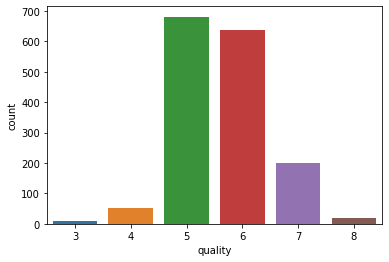

In [10]:
# analyze "quality" feature
sns.countplot(red_df['quality'])
plt.show()

the majority of wine is of medium quality

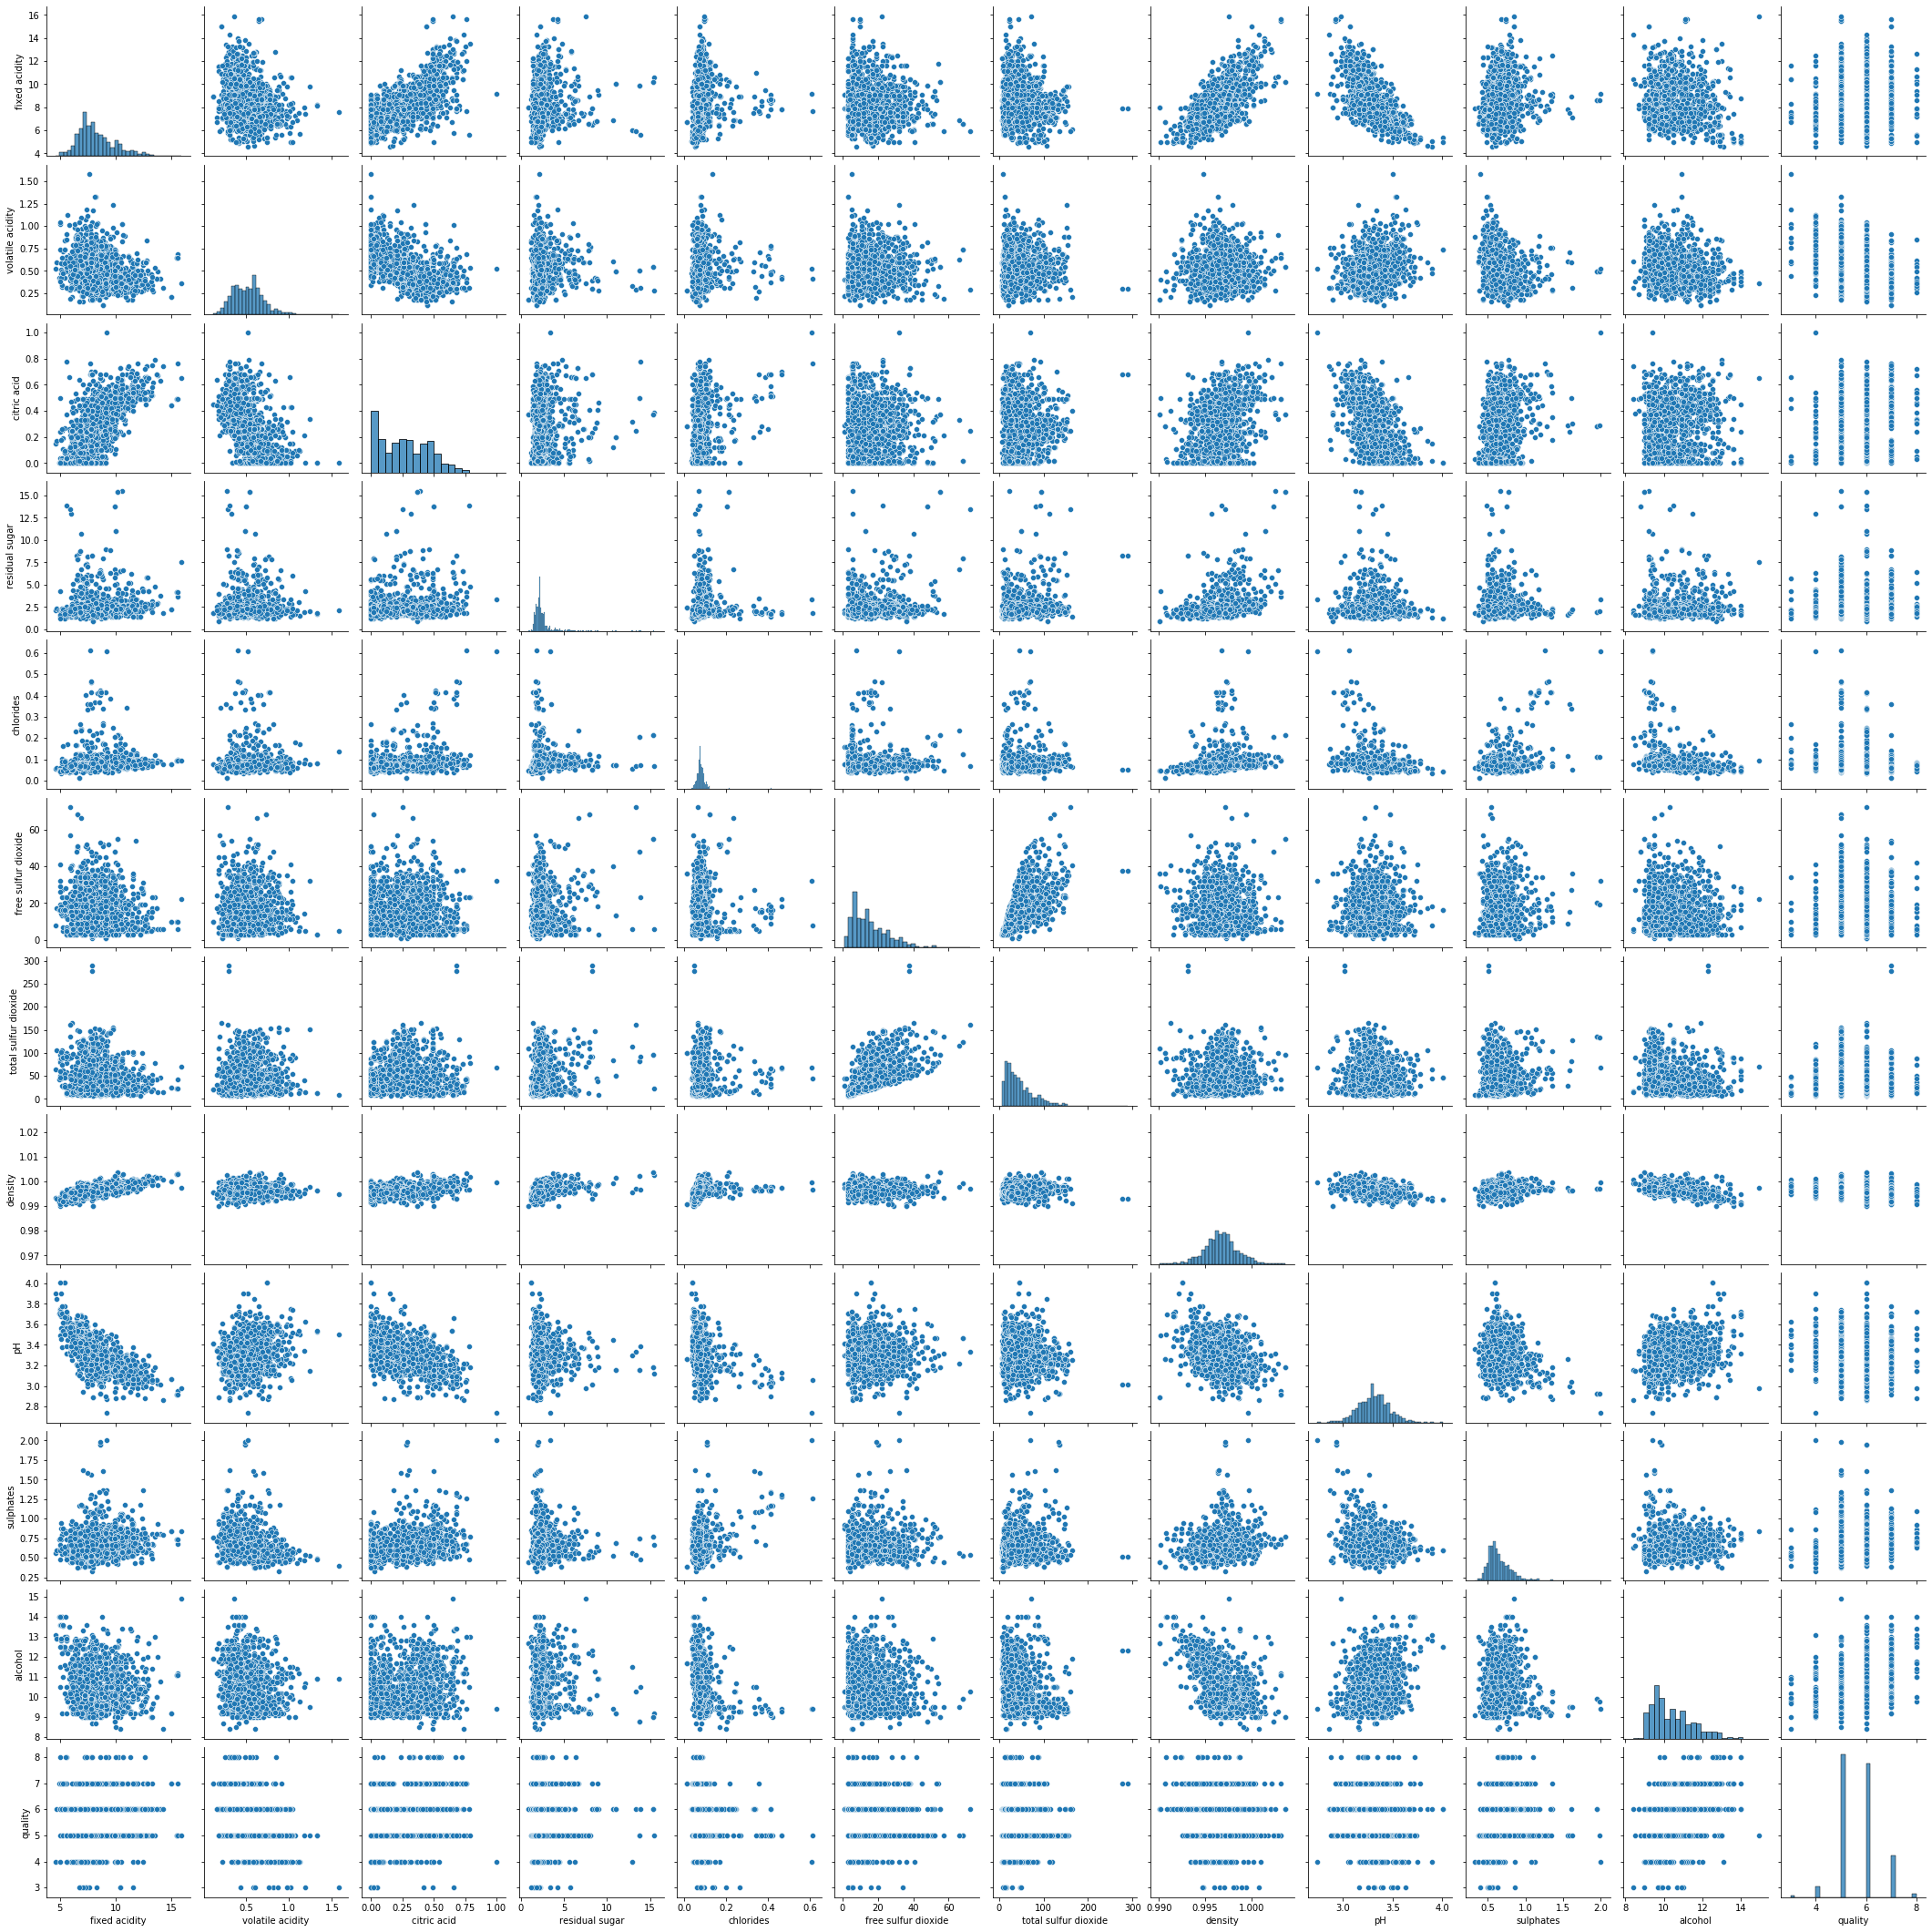

In [11]:
# plotting pair plots
sns.pairplot(red_df)
plt.show()

**Inference**

* There some positive correlation between `fixed acidity` and `density` 
* There is a negative correlation of `acidity` with `pH` 
* There is a negative correlation between `alcohol percentage` and `density` 

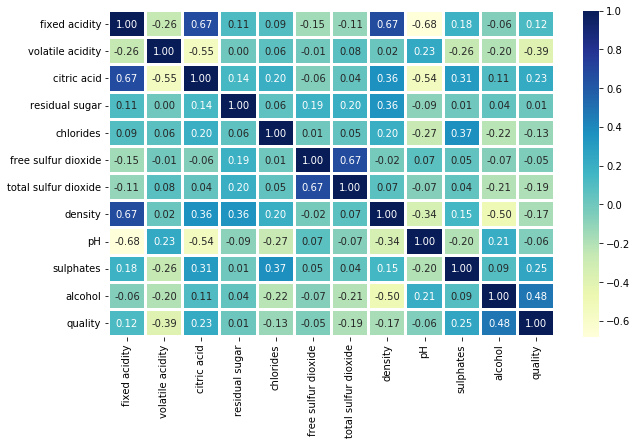

In [12]:
# heatmap showing the correlation between different features
plt.figure(figsize=(10,6))
sns.heatmap(red_df.corr(), annot=True, fmt='.2f', linewidths=2, cmap='YlGnBu')
plt.show()

the quality column has a positive correlation with alcohol, sulfates, residual sugar, citric acid, and fixed acidity

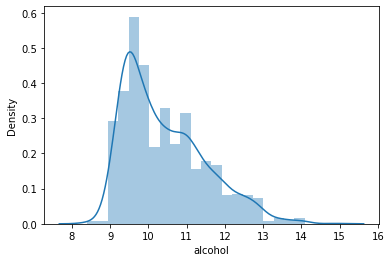

In [13]:
# alcohol distribution plot
sns.distplot(red_df['alcohol'])
plt.show()

alcohol distribution is positively skewed with the quality of the red wine

In [14]:
# verify the skewness using the skew method 
skew(red_df['alcohol'])

0.8600210646566755

Let's see how the quality of wine varies with respect to alcohol concentration

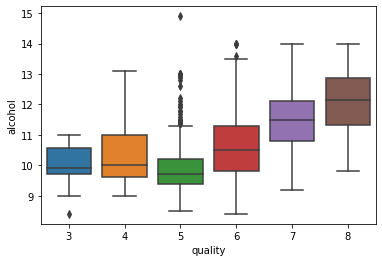

In [15]:
# variation of the quality of wine with respect to alcohol concentration
sns.boxplot(x='quality', y='alcohol', data=red_df)
plt.show()

the box showing some dots outside of the graph. Those are outliers. Most of the outliers as are around wine with quality 5 and 6. We can remove the outliers by passing an argument, `showfliers=False`

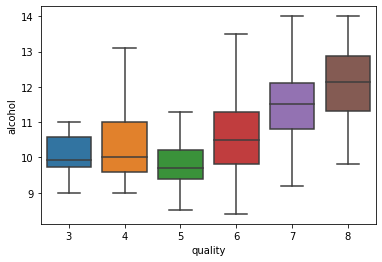

In [16]:
# variation of the quality of wine with respect to alcohol concentration without outliers
sns.boxplot(x='quality', y='alcohol', data=red_df, showfliers=False)
plt.show()

as we can see that as the quality of wine increases, so does the alcohol concentration which is true. The higher the alcohol concentration is, the higher the quality of the wine.

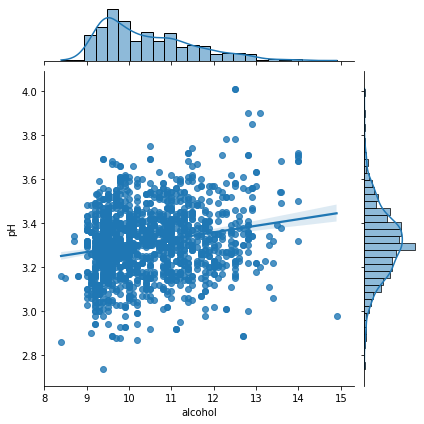

In [17]:
# check correlation between alcohol concentration and the pH values
sns.jointplot(x='alcohol',y='pH',data=red_df, kind='reg')
plt.show()

alcohol is weakly positively related to the pH values as per heatmap `.21`

In [18]:
# custom method to see the correlation between any two columns
def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print("Correlation between {} and {} is {}".format(column1, column2, pearson_corr))
  print("P-value of this correlation is {}".format(p_value))

In [19]:
# view correlation between alcohol and pH
get_correlation('alcohol','pH', red_df)

Correlation between alcohol and pH is 0.20563250850549825
P-value of this correlation is 9.96449774146556e-17


## Analyze White Wine

In [20]:
# view top 5 rows
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
# view features
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

features in both the datasets are same

In [22]:
# view statistic details
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


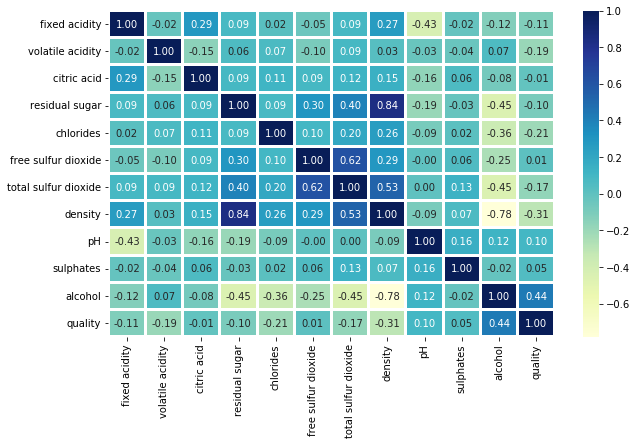

In [23]:
# heatmap showing the correlation between different features
plt.figure(figsize=(10,6))
sns.heatmap(white_df.corr(), annot=True, fmt='.2f', linewidths=2, cmap='YlGnBu')
plt.show()

In [24]:
print(f'red wine quality average: {red_df.quality.mean()}\nwhite wine quality average: {white_df.quality.mean()}')

red wine quality average: 5.6360225140712945
white wine quality average: 5.87790935075541


In [25]:
# create new feature "wine_category"
red_df = red_df.assign(wine_category='red')
white_df = white_df.assign(wine_category='white')

In [26]:
# print unique value for "quality" feature
print('red:', sorted(red_df.quality.unique()))
print('white:', sorted(white_df.quality.unique()))

red: [3, 4, 5, 6, 7, 8]
white: [3, 4, 5, 6, 7, 8, 9]


both the red and the white wines have the same unique values for the quality feature

### Convert Numerical Feature to Categorical Feature

Create new feature `quality_label` with labels `low, medium and high`
* low - if quality value less or equal to 5
* medium - if quality value is greater than 5 and less or equal to 7
* high - if quality value is greater than 7

In [27]:
# create "quality_label" for red wine dataframe
red_df = red_df.assign(quality_label=red_df.quality.apply(
    lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high'
))
red_df.quality_label = pd.Categorical(red_df.quality_label, 
                                      categories=['low','medium','high'])
red_df.quality_label.value_counts()

medium    837
low       744
high       18
Name: quality_label, dtype: int64

In [28]:
white_df.shape

(4898, 13)

In [29]:
# create "quality_label" for white wine dataframe
white_df = white_df.assign(quality_label=white_df.quality.apply(
    lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high'
))
white_df.quality_label = pd.Categorical(white_df.quality_label, 
                                      categories=['low','medium','high'])
white_df.quality_label.value_counts()

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64

In [30]:
# combine both dataframe
wines_df = pd.concat([red_df, white_df])
wines_df.shape

(6497, 14)

In [31]:
# re-shuffle the rows so that it randomizes the data points
wines_df = wines_df.sample(frac=1.0, random_state=42).reset_index(drop=True)
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


### Grouping Features

In [32]:
# grouping the features and performing the describe operation
group_features = ['alcohol', 'density', 'pH', 'quality']

low_df = round(wines_df[wines_df.quality_label=='low'][group_features].describe(), 2)
medium_df = round(wines_df[wines_df.quality_label=='medium'][group_features].describe(), 2)
high_df = round(wines_df[wines_df.quality_label=='high'][group_features].describe(), 2)

keys = ['👎 Low Quality Wine', '👌 Medium Quality Wine', '👍 High Quality Wine']
pd.concat([low_df, medium_df, high_df], axis=1, keys=keys)

👎 Low Quality Wine                            👌 Medium Quality Wine  \
                 alcohol  density       pH  quality               alcohol   
count            2384.00  2384.00  2384.00  2384.00               3915.00   
mean                9.87     1.00     3.21     4.88                 10.81   
std                 0.84     0.00     0.16     0.36                  1.20   
min                 8.00     0.99     2.74     3.00                  8.40   
25%                 9.30     0.99     3.11     5.00                  9.80   
50%                 9.60     1.00     3.20     5.00                 10.80   
75%                10.40     1.00     3.31     5.00                 11.70   
max                14.90     1.00     3.90     5.00                 14.20   

                                 👍 High Quality Wine                          
       density       pH  quality             alcohol density      pH quality  
count  3915.00  3915.00  3915.00              198.00  198.00  198.00  198.00  
mean      0.99     3.22     6.28               11.69    0.99    3.23    8.03  
std       0.00     0.16     0.45                1.27    0.00    0.16    0.16  
min       0.99     2.72     6.00                8.50    0.99    2.88    8.00  
25%       0.99     3.11     6.00               11.00    0.99    3.13    8.00  
50%       0.99     3.21     6.00               12.00    0.99    3.23    8.00  
75%       1.00     3.33     7.00               12.60    0.99    3.33    8.00  
max       1.04     4.01     7.00               14.00    1.00    3.72    9.00

## Univariate Analysis

<i><b>Note:</b> The simplest way to visualize the numeric data and their distribution is by using a histogram</i>

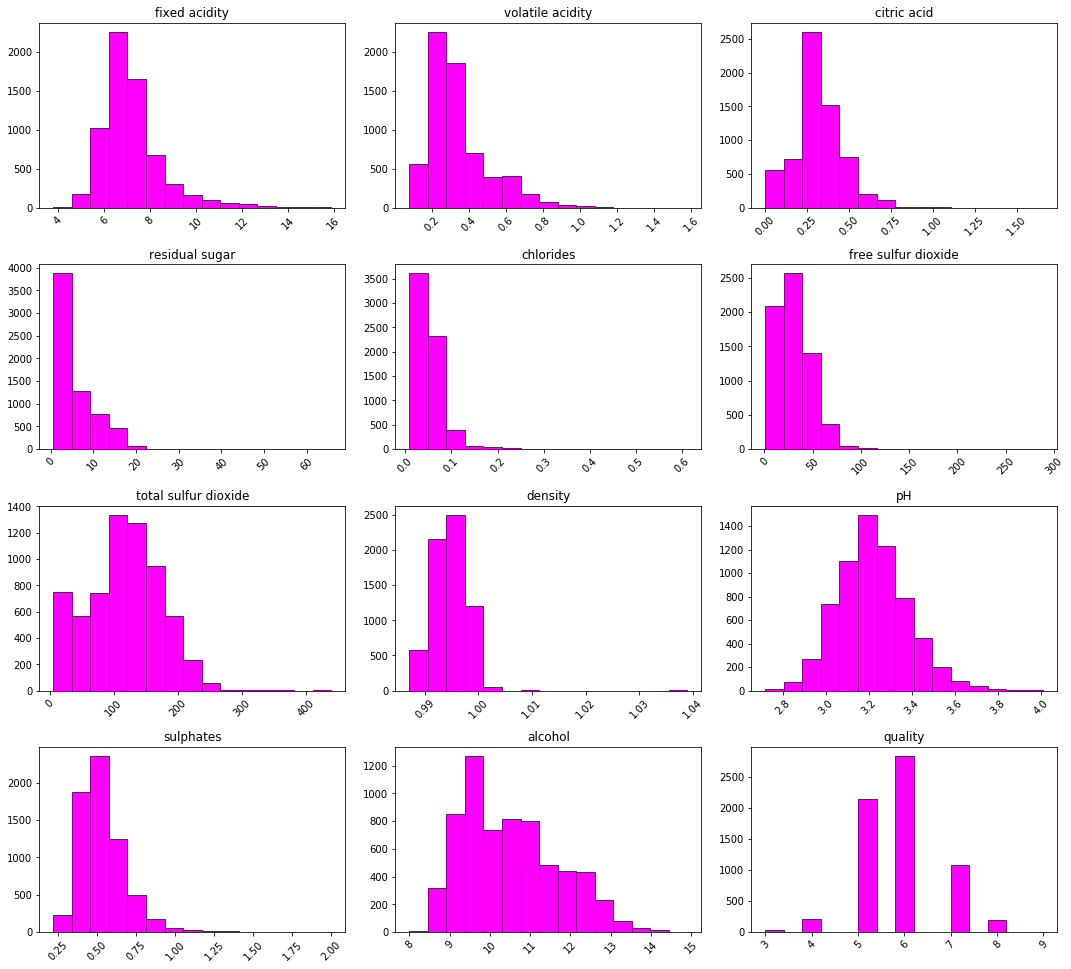

In [33]:
# univariate analysis
wines_df.hist(bins=15, color='fuchsia', edgecolor='darkmagenta', linewidth=1.0, 
              xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

## Multivariate Analysis

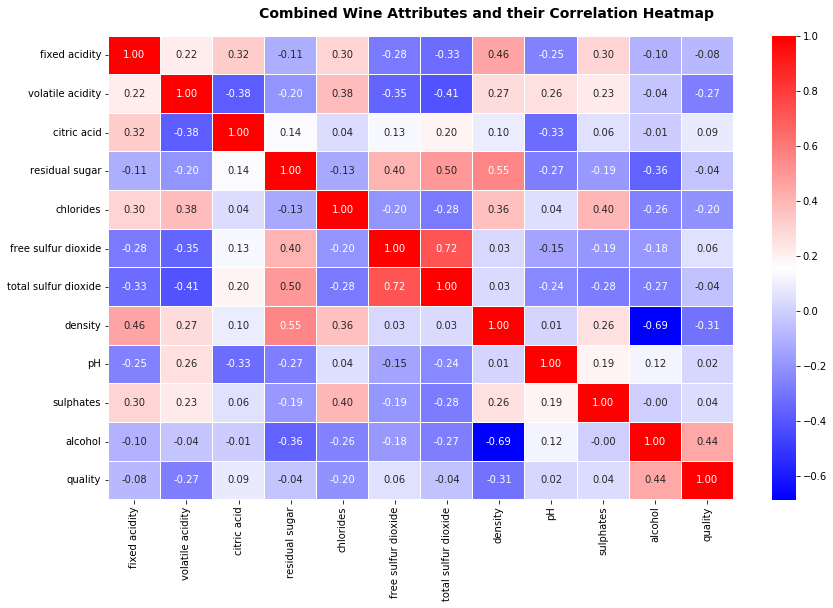

In [34]:
# correlation between several features of combined dataframe
fig, (ax) = plt.subplots(1, 1, figsize=(14,8))

sns.heatmap(wines_df.corr(), ax=ax, cmap="bwr", annot=True, fmt='.2f', linewidths=.05)
fig.subplots_adjust(top=0.93)
fig.suptitle('Combined Wine Attributes and their Correlation Heatmap', 
             fontsize=14, fontweight='bold')
plt.show()

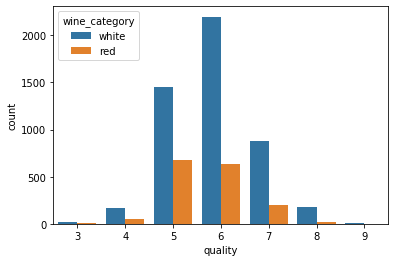

In [35]:
# discrete categorical attributes
sns.countplot(data=wines_df, x='quality', hue='wine_category')
plt.show()

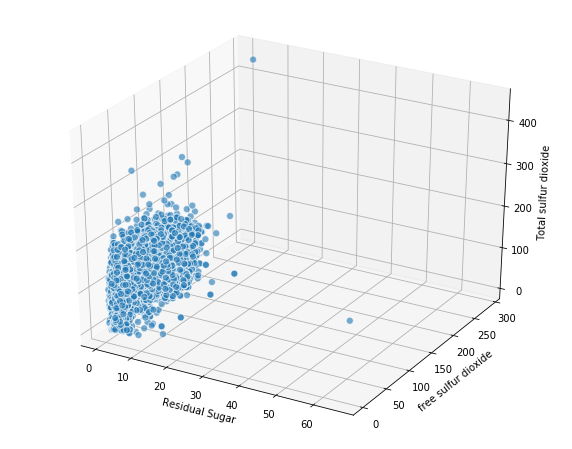

In [36]:
# 3-D plot illustrating the correlation between three different columns
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xscale = wines_df['residual sugar']
yscale = wines_df['free sulfur dioxide']
zscale = wines_df['total sulfur dioxide']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('free sulfur dioxide')
ax.set_zlabel('Total sulfur dioxide')

plt.show()

three features show a positive correlation with respect to one another

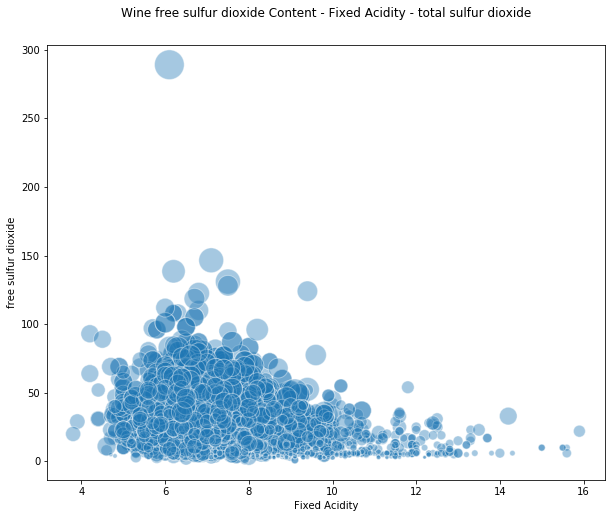

In [37]:
fig = plt.figure(figsize=(10,8))

plt.scatter(x = wines_df['fixed acidity'], 
            y = wines_df['free sulfur dioxide'], 
            s = wines_df['total sulfur dioxide'] * 2,
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('free sulfur dioxide')
plt.title('Wine free sulfur dioxide Content - Fixed Acidity - total sulfur dioxide', y=1.05)
plt.show()

The size of the circles denotes the third variable. In this case, the larger the radius of the circle is, the higher the value of residual sugar. So, if we look carefully, we will notice most of the higher circles are located between the x axis with values of 4 and 10 and with the y axis with values between 25 and 150

Now we are going to encode the categorical values for the `quality_label` column. 

We will encode the values so that all of the low values will be changed to 0, the medium values will be changed to 1, and the high values will be changed to 2.

In [38]:
# perform label encoding
label_quality = LabelEncoder()
wines_df.quality_label = label_quality.fit_transform(wines_df.quality_label)
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,0
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,1
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,2
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,2
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,2


In [39]:
# creating response and target variables
X = wines_df.drop(columns=['quality','wine_category'], axis=1)
y = wines_df.quality_label

In [40]:
# perfrom train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
# create list of models and their names
models = [LogisticRegression(), 
          LinearSVC(), 
          SVC(kernel='rbf'), 
          KNeighborsClassifier(),
          RandomForestClassifier(), 
          DecisionTreeClassifier(),
          GradientBoostingClassifier(),
          GaussianNB()
         ]

model_names = ['LogisticRegression',
               'LinearSVM','rbfSVM',
               'KNearestNeighbors',
               'RandomForestClassifier',
               'DecisionTree',
               'GradientBoostingClassifier',
               'GaussianNB'
              ]

In [42]:
# loop over each model, create a model, and then evaluate the accuracy
acc = []
eval_acc = {}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train,y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
eval_acc = {'Modelling Algorithm':model_names, 'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.9702564102564103,
  0.9738461538461538,
  0.6051282051282051,
  0.6912820512820513,
  1.0,
  1.0,
  1.0,
  1.0]}

In [43]:
# create accuracy dataframe of different algorithms
acc_table = pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
4,RandomForestClassifier,1.000000
5,DecisionTree,1.000000
6,GradientBoostingClassifier,1.000000
7,GaussianNB,1.000000
1,LinearSVM,0.973846
0,LogisticRegression,0.970256
3,KNearestNeighbors,0.691282
2,rbfSVM,0.605128


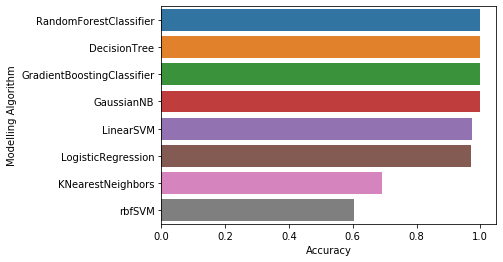

In [44]:
# view different types of algorithms and their accuracies
sns.barplot(y='Modelling Algorithm', x='Accuracy', data=acc_table)
plt.show()

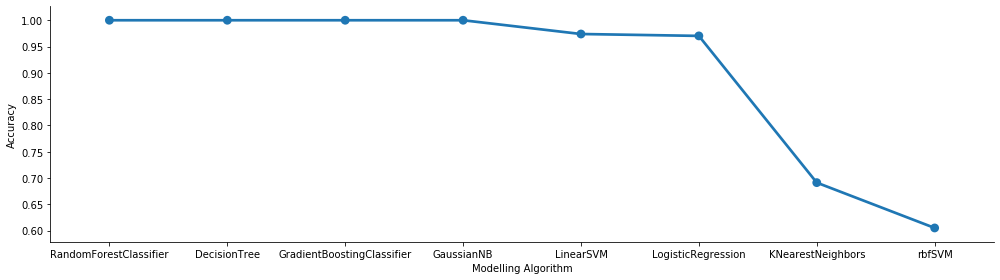

In [45]:
# plotting acurracy and modeling algorithm
sns.catplot(x='Modelling Algorithm',y='Accuracy',
            data=acc_table,kind='point',size=4,aspect=3.5)
plt.show()